# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as  pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Base url
unit = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?units={unit}&appid={api_key}&q="


## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# JSON code/indices check
requests.get(url + cities[0]).json()

{'coord': {'lon': -48.93, 'lat': -23.1},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 66.52,
  'pressure': 1012.56,
  'humidity': 99,
  'temp_min': 66.52,
  'temp_max': 66.52,
  'sea_level': 1012.56,
  'grnd_level': 943.3},
 'wind': {'speed': 3.27, 'deg': 132.505},
 'clouds': {'all': 92},
 'dt': 1551340619,
 'sys': {'message': 0.0037,
  'country': 'BR',
  'sunrise': 1551345061,
  'sunset': 1551390301},
 'id': 3471291,
 'name': 'Avare',
 'cod': 200}

In [8]:
print("Beginning Data Retrieval")
print("-----------------------------")

weather_info = []
record = 1
set_number = 1

for city in cities:
    response = requests.get(url + city)
    if response.status_code == 200:
        response_json = response.json()
        weather_info.append([city, response_json["clouds"]["all"], 
                             response_json["sys"]["country"], 
                             response_json["dt"], 
                             response_json["main"]["humidity"], 
                             response_json["coord"]["lat"],
                             response_json["coord"]["lon"],
                             response_json["main"]["temp_max"], 
                             response_json["wind"]["speed"]                             
                            ])
        
        print(f"Processing Record {record} of Set {set_number} | {city}")
        
        if record < 50:
            record = record + 1
        elif record >= 50:
            record = 1
            set_number = set_number + 1
        
    else:
        print("City not found. Skipping...")
        
    time.sleep(1.1)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | avare
City not found. Skipping...
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | hovd
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | ramnagar
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | vamvakou
City not found. Skipping...
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | jumla
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | paamiut
Processing Record 13 of Set 1 | tura
Processing Record 14 of Set 1 | port alfred
City not found. Skipping...
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | le vauclin
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | aklavik
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | morros
Processing Record 21 of Set 1 | busselton
Processing Record 22 o

Processing Record 30 of Set 4 | sudbury
Processing Record 31 of Set 4 | moussoro
Processing Record 32 of Set 4 | iwanai
Processing Record 33 of Set 4 | muriti
Processing Record 34 of Set 4 | pando
Processing Record 35 of Set 4 | vardo
Processing Record 36 of Set 4 | boa vista
Processing Record 37 of Set 4 | hofn
Processing Record 38 of Set 4 | yumen
Processing Record 39 of Set 4 | talnakh
Processing Record 40 of Set 4 | alanya
Processing Record 41 of Set 4 | saint george
Processing Record 42 of Set 4 | billings
Processing Record 43 of Set 4 | kulhudhuffushi
Processing Record 44 of Set 4 | prince rupert
Processing Record 45 of Set 4 | ixtapa
Processing Record 46 of Set 4 | tomatlan
Processing Record 47 of Set 4 | yellowknife
Processing Record 48 of Set 4 | cherskiy
Processing Record 49 of Set 4 | pangody
Processing Record 50 of Set 4 | provideniya
Processing Record 1 of Set 5 | isangel
Processing Record 2 of Set 5 | kutum
Processing Record 3 of Set 5 | nantucket
Processing Record 4 of S

ConnectionError: HTTPConnectionPool(host='api.openweathermap.org', port=80): Max retries exceeded with url: /data/2.5/weather?units=imperial&appid=5ebecf8fd0dba6026072706cea7ad90c&q=luderitz (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x116ac84e0>: Failed to establish a new connection: [Errno 50] Network is down',))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df = pd.DataFrame(weather_info)

weather_df.columns =["City", "Cloudiness", "Country", "Date", "Humidity", 
                     "Lat", "Lng", "Max Temp", "Wind Speed"]

weather_df.to_csv('Weather_Info.csv', index=False)

weather_df.count()

City          210
Cloudiness    210
Country       210
Date          210
Humidity      210
Lat           210
Lng           210
Max Temp      210
Wind Speed    210
dtype: int64

In [10]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,avare,92,BR,1551340619,99,-23.10,-48.93,66.52,3.27
1,kapaa,40,US,1551340395,52,22.08,-159.32,66.20,11.41
2,hovd,75,NO,1551340531,86,63.83,10.70,39.99,24.16
3,hithadhoo,56,MV,1551340625,100,-0.60,73.08,82.49,10.98
4,ramnagar,12,IN,1551340626,100,27.17,84.33,64.18,4.27


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

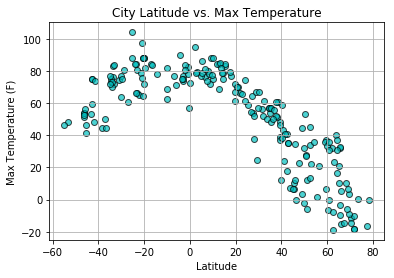

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", color='c',
            edgecolor='black', alpha=0.7)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

#### Latitude vs. Humidity Plot

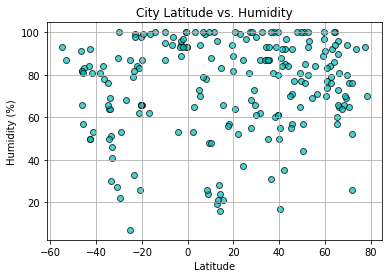

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", color='c',
            edgecolor='black', alpha=0.7)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

#### Latitude vs. Cloudiness Plot

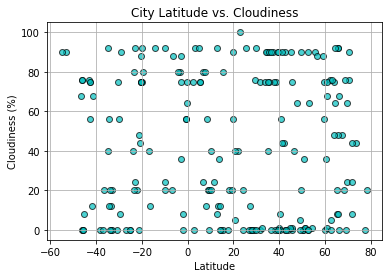

In [13]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", color='c',
            edgecolor='black', alpha=0.7)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

#### Latitude vs. Wind Speed Plot

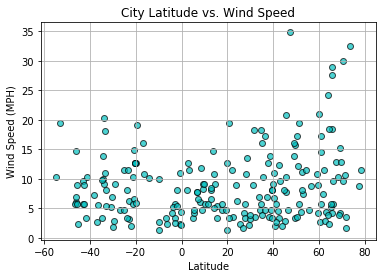

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", color='c',
            edgecolor='black', alpha=0.7)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid()